In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import seaborn as sns
import geopandas as gpd

sns.set_theme(palette = "pastel")

### ANALISIS A NIVEL NACIONAL

Accesos por rangos de velocidad trimestral - Nacional

In [2]:
df_accesos_veloc_nac = pd.read_csv("Datasets\Internet\Acceso_Internet_Fijo_por_rangos_velocidad_bajada_nacional.csv")
df_accesos_veloc_nac.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31.981,85.668,1.075.272,1.109.421,765.015,335.573,7.410.902,394.282,11.208.114
1,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128
2,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684
3,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009
4,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794


In [3]:
# Conflicto con los puntos, corregimos para que tome el valor correctamente.
df_accesos_veloc_nac = df_accesos_veloc_nac.applymap(lambda x: str(x).replace('.', '')).astype(int)

In [4]:
df_accesos_veloc_nac.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
1,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
2,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
3,2022,1,3489,10484,1263273,1209148,967508,509830,6336187,198333,10624009
4,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794


In [5]:
df_accesos_veloc_nac.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,36.000000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,3.600000e+01
mean,2018.000000,2.500000,36298.138889,220559.333333,3.552501e+06,9.034036e+05,9.147367e+05,4.990417e+05,2.053382e+06,122895.250000,8.337742e+06
std,2.618615,1.133893,44799.878520,206489.872470,1.342734e+06,2.453029e+05,4.818186e+05,4.658192e+05,2.498904e+06,121902.990325,1.504414e+06
min,2014.000000,1.000000,3489.000000,2898.000000,1.075272e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.750000,14749.250000,41936.500000,2.634148e+06,7.884982e+05,6.803692e+05,6.239875e+04,2.761000e+04,0.000000,7.085635e+06
50%,2018.000000,2.500000,32497.000000,208301.000000,3.415018e+06,9.781860e+05,8.111225e+05,4.975755e+05,4.845840e+05,155810.000000,8.228740e+06
75%,2020.000000,3.250000,41038.000000,316865.000000,4.970678e+06,1.065288e+06,1.139898e+06,6.358098e+05,4.099905e+06,199011.250000,9.410040e+06
max,2022.000000,4.000000,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,7.410902e+06,394282.000000,1.120811e+07


In [6]:
df_accesos_veloc_nac.dtypes

Año                        int32
Trimestre                  int32
Hasta 512 kbps             int32
Entre 512 Kbps y 1 Mbps    int32
Entre 1 Mbps y 6 Mbps      int32
Entre 6 Mbps y 10 Mbps     int32
Entre 10 Mbps y 20 Mbps    int32
Entre 20 Mbps y 30 Mbps    int32
Más de 30 Mbps             int32
OTROS                      int32
Total                      int32
dtype: object

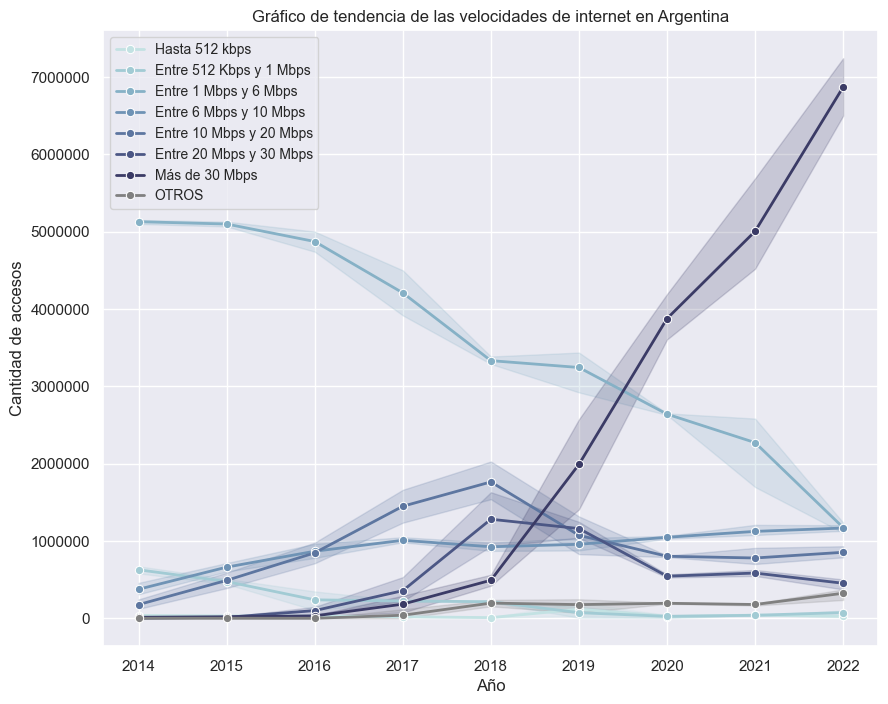

In [7]:
# Grafico de tendencia

# Crear el gráfico de líneas con todas las velocidades de internet juntas
plt.figure(figsize=(10, 8))
# Crear una paleta de colores que aumente gradualmente en intensidad
palette = sns.color_palette("ch:start=.2,rot=-.3", len(df_accesos_veloc_nac.columns[2:-1]))

for i, columna in enumerate(df_accesos_veloc_nac.columns[2:-2]):
    sns.lineplot(data = df_accesos_veloc_nac, x = 'Año', y = columna, marker = 'o', markersize = 6,
                 linewidth = 2, label = columna, color = palette[i])
sns.lineplot(data = df_accesos_veloc_nac, x = 'Año', y = "OTROS", marker = 'o', markersize = 6,
                 linewidth = 2, label = "OTROS", color = "grey")

# Agregar título y etiquetas de los ejes
plt.title('Gráfico de tendencia de las velocidades de internet en Argentina')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')

# Formatear automáticamente las etiquetas del eje y en millones
plt.ticklabel_format(style='plain', axis='y', useOffset=False, scilimits=(6, 6))

# Mostrar leyenda
plt.legend(fontsize='small')

# Mostrar el gráfico
plt.show()

Podemos ver que las altas velocidades de internet crecen exponencialmente y las bajas empiezan a entrar en desuso. ¿Tendrá relación con la tecnología?

Accesos por tecnología trimestral - Nacional

In [8]:
df_accesos_tecn_nac = pd.read_csv("Datasets\Internet\Accesos_Internet_fijo_por_tecnología_nacional.csv")

In [9]:
df_accesos_tecn_nac.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1,6,3,573,222,11,Oct-Dic 2022
1,2022,3,1,6,3,557,235,11,Jul-Sept 2022
2,2022,2,1,6,3,556,232,11,Abr-Jun 2022
3,2022,1,2,6,2,546,252,11,Ene-Mar 2022
4,2021,4,2,6,2,523,253,10,Oct-Dic 2021


In [10]:
# Las primeras cuatro columnas y "Total" son en millones, "Wireless" y "Otros" en miles. Unificamos
df_accesos_tecn_nac.iloc[:,[2,3,4,7]] = df_accesos_tecn_nac.iloc[:,[2,3,4,7]] * 1000000
df_accesos_tecn_nac.iloc[:,[5,6]] = df_accesos_tecn_nac.iloc[:,[5,6]] * 1000

In [11]:
# Eliminamos la columna Periodo que es redundante y corregimos los puntos para que tome los valores correctamente.
df_accesos_tecn_nac = df_accesos_tecn_nac.drop(columns = ["Periodo"])

In [12]:
df_accesos_tecn_nac.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,36.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,36.000000,3.600000e+01
mean,2018.000000,2.500000,3.083333e+06,4.166667e+06,1.933611e+08,257222.222222,149500.000000,8.361111e+06
std,2.618615,1.133893,1.079021e+06,1.253566e+06,2.397150e+08,180185.319064,85497.034201,1.495761e+06
min,2014.000000,1.000000,1.000000e+06,2.000000e+06,1.000000e+06,71000.000000,54000.000000,6.000000e+06
25%,2016.000000,1.750000,2.000000e+06,3.000000e+06,2.750000e+06,85000.000000,64250.000000,7.000000e+06
50%,2018.000000,2.500000,4.000000e+06,4.000000e+06,1.590000e+08,220000.000000,116500.000000,8.000000e+06
75%,2020.000000,3.250000,4.000000e+06,5.000000e+06,1.982500e+08,415250.000000,247500.000000,9.250000e+06
max,2022.000000,4.000000,4.000000e+06,6.000000e+06,9.410000e+08,573000.000000,265000.000000,1.100000e+07


In [13]:
# Vemos errores en la columna fibra optica desde el año 2019 trimestre 4 hacia atrás 
# (es porque multiplicamos por millon pero eran miles)
df_accesos_tecn_nac

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,1000000,6000000,3000000,573000,222000,11000000
1,2022,3,1000000,6000000,3000000,557000,235000,11000000
2,2022,2,1000000,6000000,3000000,556000,232000,11000000
3,2022,1,2000000,6000000,2000000,546000,252000,11000000
4,2021,4,2000000,6000000,2000000,523000,253000,10000000
5,2021,3,2000000,6000000,2000000,492000,250000,10000000
6,2021,2,2000000,6000000,1000000,477000,254000,10000000
7,2021,1,2000000,5000000,1000000,435000,250000,10000000
8,2020,4,2000000,5000000,1000000,422000,253000,10000000
9,2020,3,2000000,5000000,1000000,413000,249000,9000000


In [14]:
# Corregimos el error citado anteriormente
df_accesos_tecn_nac.loc[12:, "Fibra óptica"] = df_accesos_tecn_nac.loc[12:, "Fibra óptica"] / 1000

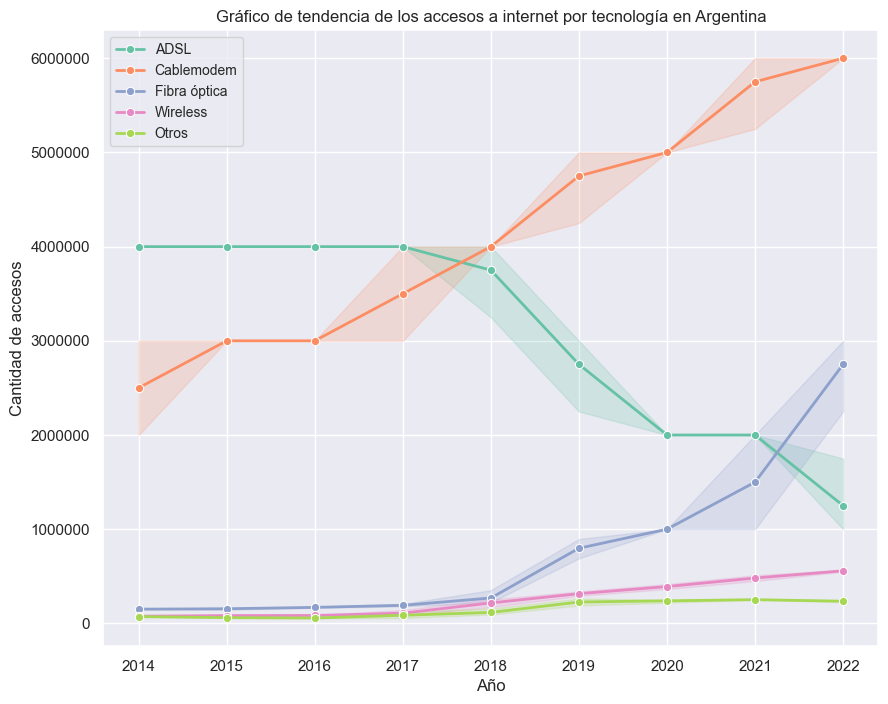

In [15]:
# Hacemos un grafico de tendencia similar al de las velocidades

# Crear el gráfico de líneas con todas las velocidades de internet juntas
plt.figure(figsize=(10, 8))
# Crear una paleta de colores que aumente gradualmente en intensidad
palette = sns.color_palette("Set2", len(df_accesos_tecn_nac.columns[2:-1]))

for i, columna in enumerate(df_accesos_tecn_nac.columns[2:-1]):
    sns.lineplot(data = df_accesos_tecn_nac, x = 'Año', y = columna, marker = 'o', markersize = 6,
                 linewidth = 2, label = columna, color = palette[i])

# Agregar título y etiquetas de los ejes
plt.title('Gráfico de tendencia de los accesos a internet por tecnología en Argentina')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')

# Formatear automáticamente las etiquetas del eje y en millones
plt.ticklabel_format(style='plain', axis='y', useOffset=False, scilimits=(6, 6))

# Mostrar leyenda
plt.legend(fontsize='small')

# Mostrar el gráfico
plt.show()

Vemos el punto de inflexión y tendencia alcista en la utilización de fibra óptica en 2018. Cablemodem y fibra óptica son dos productos en distintas etapas de su ciclo de vida. El cablemodem seguramente esté por alcanzar su madurez y la fibra óptica está en clara etapa de crecimiento. ADSL está en un claro declive y Wireless es una solución no escalable al menos en la actualidad, se utiliza en sectores aislados donde otras tecnologías no llegan, por lo que no vemos una tendencia. Luego intentaremos afirmar nuestra hipótesis con mejor información.

### ANALISIS A NIVEL PROVINCIAL

Accesos por rangos de velocidad trimestral - Provincial

In [17]:
df_accesos_veloc_prov = pd.read_csv("Datasets\Internet\Acceso_Internet_Fijo_por_rangos_velocidad_bajada_y_provincia.csv")

In [18]:
df_accesos_veloc_prov.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,Catamarca,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,2022,4,Chaco,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,2022,4,Chubut,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759


In [19]:
df_accesos_veloc_prov.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,858.000000
mean,2018.000000,2.500000,126.069829,104.202722,70.717505,78.652155,99.993059,34.439517
std,2.583484,1.118682,186.417712,211.789353,138.831868,168.570068,207.349280,133.288022
min,2014.000000,1.000000,1.007000,0.000000,0.000000,0.000000,0.000000,-1.945000
25%,2016.000000,1.750000,11.000000,3.310750,5.410250,5.000000,2.091000,0.000000
50%,2018.000000,2.500000,51.000000,8.762000,20.208000,15.159000,11.042500,0.000000
75%,2020.000000,3.250000,133.250000,85.525500,61.934500,51.959500,64.286250,7.939750
max,2022.000000,4.000000,998.000000,999.000000,917.000000,978.000000,997.000000,989.000000


In [20]:
# En el describe vemos que tenemos un conflicto con los puntos, debemos eliminarlos para que tome bien los valores en las columnas numericas
col_numericas = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', 
'+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']

In [21]:
df_accesos_veloc_prov[col_numericas] = df_accesos_veloc_prov[col_numericas].applymap(lambda x: str(x).replace('.', '')).astype(float)

In [22]:
df_accesos_veloc_prov.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000,864.000000,864.000000,8.640000e+02,858.000000,8.640000e+02
mean,2018.000000,2.500000,2886.682870,10221.003472,1.480209e+05,33547.171296,34436.415509,19182.944444,8.555756e+04,5208.797203,3.474059e+05
std,2.583484,1.118682,10789.912094,21320.768124,3.438435e+05,60076.453978,86542.136272,69428.537032,3.635417e+05,12927.225226,7.450600e+05
min,2014.000000,1.000000,60.000000,0.000000,2.531000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.750000,337.500000,1372.000000,2.744150e+04,3041.000000,2127.500000,220.000000,8.000000e+00,0.000000,5.274050e+04
50%,2018.000000,2.500000,1045.000000,3727.000000,4.783750e+04,8459.000000,7868.500000,2341.500000,1.019000e+03,0.000000,1.052355e+05
75%,2020.000000,3.250000,2553.250000,8324.000000,8.639200e+04,29956.000000,24457.250000,9284.000000,2.247475e+04,5729.750000,1.791482e+05
max,2022.000000,4.000000,199768.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.760109e+06,120464.000000,4.794665e+06


In [23]:
# En la columna OTROS tenemos valores NaN. 
# Interpolamos estos valores con trimestre del año anterior y siguiente
df_accesos_veloc_prov[df_accesos_veloc_prov["OTROS"].isna()]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
337,2019,2,Capital Federal,740.0,1027.0,281370.0,124087.0,239691.0,296155.0,475991.0,NaN,1418395.0
347,2019,2,La Rioja,90.0,110.0,39819.0,4297.0,4857.0,130.0,1298.0,NaN,50304.0
348,2019,2,Mendoza,200.0,2522.0,205165.0,2971.0,10092.0,1256.0,234.0,NaN,222260.0
355,2019,2,Santa Cruz,250.0,840.0,24861.0,3806.0,1202.0,280.0,4.0,NaN,30010.0
358,2019,2,Tierra Del Fuego,60.0,1230.0,41824.0,4241.0,1573.0,960.0,32.0,NaN,47895.0
359,2019,2,Tucumán,160.0,1570.0,78891.0,44296.0,24291.0,6280.0,18394.0,NaN,166673.0


In [24]:
df_accesos_veloc_prov.sort_values(['Provincia','Trimestre', 'Año'], inplace=True)
grouped = df_accesos_veloc_prov.groupby(['Provincia', 'Trimestre'], group_keys = False)

# Interpolar los valores NaN dentro de cada grupo de provincia y trimestre
df_accesos_veloc_prov['OTROS'] = grouped['OTROS'].apply(lambda x: x.interpolate())

In [26]:
# Hay valores negativos, los ponemos en cero
df_accesos_veloc_prov.loc[df_accesos_veloc_prov["OTROS"] < 0, "OTROS"] = 0

In [27]:
# Convertimos estas columnas en entero
df_accesos_veloc_prov[col_numericas] = df_accesos_veloc_prov[col_numericas].astype(int)

In [29]:
# Corregimos la columna Total
columnas_a_sumar = col_numericas.copy()
columnas_a_sumar.remove("Total")
df_accesos_veloc_prov["Total"] = df_accesos_veloc_prov[columnas_a_sumar].sum(axis = 1)

In [30]:
df_accesos_veloc_prov.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000,864.000000,864.000000,8.640000e+02,864.000000,8.640000e+02
mean,2018.000000,2.500000,2886.682870,10221.003472,1.480209e+05,33547.171296,34436.415509,19182.944444,8.555756e+04,5211.099537,3.390638e+05
std,2.583484,1.118682,10789.912094,21320.768124,3.438435e+05,60076.453978,86542.136272,69428.537032,3.635417e+05,12889.276579,7.204018e+05
min,2014.000000,1.000000,60.000000,0.000000,2.531000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.265600e+04
25%,2016.000000,1.750000,337.500000,1372.000000,2.744150e+04,3041.000000,2127.500000,220.000000,8.000000e+00,0.000000,5.636200e+04
50%,2018.000000,2.500000,1045.000000,3727.000000,4.783750e+04,8459.000000,7868.500000,2341.500000,1.019000e+03,0.000000,1.059780e+05
75%,2020.000000,3.250000,2553.250000,8324.000000,8.639200e+04,29956.000000,24457.250000,9284.000000,2.247475e+04,5673.250000,1.786840e+05
max,2022.000000,4.000000,199768.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.760109e+06,120464.000000,4.667183e+06


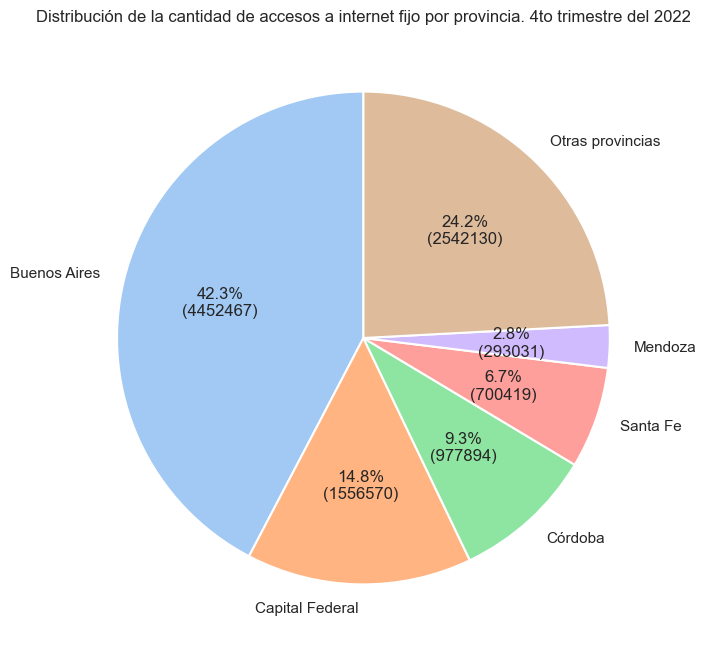

In [33]:
# Ejemplo de grafico de torta para un trimestre determinado

df_trimestre = df_accesos_veloc_prov[(df_accesos_veloc_prov['Año'] == 2022) & (df_accesos_veloc_prov['Trimestre'] == 4)]
df_trimestre = df_trimestre.sort_values("Total", ascending = False)
suma_resto = df_trimestre['Total'].iloc[5:].sum()
# Crear una nueva fila para representar las provincias agrupadas
df_agrupado = pd.DataFrame({'Provincia': ['Otras provincias'], 'Total': [suma_resto]})
df_trimestre = pd.concat([df_trimestre.head(5), df_agrupado])

plt.figure(figsize=(8, 8))
plt.pie(df_trimestre["Total"], labels = df_trimestre["Provincia"], autopct = lambda p: f"{p:.1f}%\n({int(p * sum(df_trimestre['Total']) / 100)})", 
        startangle = 90, colors = sns.color_palette('pastel'), wedgeprops = {'linewidth': 1.5, 'edgecolor': 'white'})

# Agregar título
plt.title("Distribución de la cantidad de accesos a internet fijo por provincia. 4to trimestre del 2022")

# Mostrar el gráfico
plt.show()

Podemos ver que la información está distribuida trimestralmente entre el año 2014 y 2022. No sabemos a qué se refiere la categoría OTROS, tal vez sean velocidades superiores

In [95]:
df_accesos_tecn_prov = pd.read_csv("Datasets\Internet\Acceso_Internet_fijo_por_tecnología_y_provincia.csv", skipfooter = 1)     # La ultima fila es una aclaración
df_accesos_tecn_prov.head()

C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_7104\435269648.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_accesos_tecn_prov = pd.read_csv("Datasets\Internet\Acceso_Internet_fijo_por_tecnología_y_provincia.csv", skipfooter = 1)     # La ultima fila es una aclaración


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,1,Buenos Aires,392.045,2.728.865,1.242.121,125.521,66.872,4.555.424
1,2022,1,Capital Federal,102.290,1.217.225,62.308,5.784,29.934,1.417.541
2,2022,1,Catamarca,14.181,15.517,29.118,1.328,2.234,62.378
3,2022,1,Chaco,32.391,64.546,36.662,8.164,2.356,144.119
4,2022,1,Chubut,44.133,66.667,9.184,30.592,21.052,171.628


In [96]:
df_accesos_tecn_prov

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,1,Buenos Aires,392.045,2.728.865,1.242.121,125.521,66.872,4.555.424
1,2022,1,Capital Federal,102.290,1.217.225,62.308,5.784,29.934,1.417.541
2,2022,1,Catamarca,14.181,15.517,29.118,1.328,2.234,62.378
3,2022,1,Chaco,32.391,64.546,36.662,8.164,2.356,144.119
4,2022,1,Chubut,44.133,66.667,9.184,30.592,21.052,171.628
...,...,...,...,...,...,...,...,...,...
787,2014,1,Santa Cruz,18.927,100,381,4.092,3.264,26.764
788,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
789,2014,1,Santiago Del Estero,32.567,3.598,19,915,34.000,37.133
790,2014,1,Tierra Del Fuego,21.618,2.837,648,1,2.934,28.038


In [97]:
df_accesos_tecn_prov["Año"].unique()

array(['2022', '2021', '2020', '2019', '2019 *', '2018', '2017', '2016',
       '2015', '2014'], dtype=object)

In [199]:
# Ordenamos el dataframe por
df_accesos_tecn_prov.sort_values(['Provincia', 'Año', 'Trimestre'], ascending = True, inplace=True)

In [99]:
# Las columnas año y trimestre tienen * al final en algunas filas, limpiamos esas marcas
# (Es una aclaración de que esos períodos no coinciden a nivel nacional, luego veremos que hacemos)
df_accesos_tecn_prov[["Año", "Trimestre"]] = df_accesos_tecn_prov[["Año", "Trimestre"]].apply(lambda x: x.str.replace('*', '', regex = False).str.strip()).astype(int)

In [100]:
# Conflicto con los puntos en las filas numericas, corregimos
df_accesos_tecn_prov.iloc[:,3:] = df_accesos_tecn_prov.iloc[:,3:].applymap(lambda x: str(x).replace('.', '').replace('-', '').strip()).astype(int)

C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_7104\3786905390.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_accesos_tecn_prov.iloc[:,3:] = df_accesos_tecn_prov.iloc[:,3:].applymap(lambda x: str(x).replace('.', '').replace('-', '').strip()).astype(int)


In [102]:
# Con el dataset limpio, podemos ver la distribución de las columnas
df_accesos_tecn_prov.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,792.000000,792.000000,7.920000e+02,7.920000e+02,7.920000e+02,792.000000,792.000000,7.920000e+02
mean,2017.636364,2.454545,1.316825e+05,1.670200e+05,2.466053e+04,9566.222222,6400.114899,3.388551e+05
std,2.386030,1.131306,2.614150e+05,4.104339e+05,1.043061e+05,17114.840986,9766.495147,7.267605e+05
min,2014.000000,1.000000,7.987000e+03,0.000000e+00,0.000000e+00,0.000000,13.000000,1.255700e+04
25%,2016.000000,1.000000,2.263600e+04,7.784000e+03,1.270000e+02,251.000000,637.500000,5.187900e+04
50%,2018.000000,2.000000,4.888400e+04,3.405850e+04,9.980000e+02,3936.500000,2685.000000,1.006600e+05
75%,2020.000000,3.000000,1.078012e+05,6.859675e+04,1.079325e+04,11897.250000,7377.500000,1.720025e+05
max,2022.000000,4.000000,1.586343e+06,2.728865e+06,1.242121e+06,126887.000000,73415.000000,4.555424e+06


In [ ]:
# Tenemos outliers por provincia??


In [103]:
df_accesos_tecn_prov

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
23,2022,1,Tucumán,92532,62396,86174,3995,4870,245584
47,2021,4,Tucumán,97830,59022,78790,2511,4860,238639
71,2021,3,Tucumán,104489,53868,70964,2408,7430,232472
95,2021,2,Tucumán,110429,48359,71683,1837,7430,233051
119,2021,1,Tucumán,147199,12185,69954,1834,7400,231912
...,...,...,...,...,...,...,...,...,...
672,2015,1,Buenos Aires,1583135,1096836,134177,18754,2894,2861842
696,2014,4,Buenos Aires,1575978,1070135,120528,17728,32038,2816407
720,2014,3,Buenos Aires,1562533,1110628,124474,20049,31881,2849565
744,2014,2,Buenos Aires,1568881,1025490,120008,17020,33147,2764546


Vamos a analizar si la tecnología está relacionada con la velocidad de descarga (comparamos datasets de tecnologia y velocidad por provincia)

In [104]:
# Ambos dataset tienen 792 filas, estan ordenados por Año, Trimestre y Provincia. 
# Buscamos una posible relación lineal entre variables de velocidad y tecnología
corr_matrix = pd.concat([df_accesos_tecn_prov.iloc[:, 3:8], df_accesos_veloc_prov.iloc[:, 3:11]], axis=1).corr()

In [105]:
corr_matrix

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS
ADSL,1.000000,0.763742,0.417841,0.399197,0.474271,0.477267,0.771875,0.959919,0.765691,0.796579,0.551987,0.337215,0.275346
Cablemodem,0.763742,1.000000,0.791173,0.644231,0.703311,0.540778,0.500213,0.697866,0.764283,0.722746,0.608659,0.819971,0.428584
Fibra óptica,0.417841,0.791173,1.000000,0.754043,0.639540,0.414574,0.245706,0.365741,0.494523,0.402026,0.318875,0.923801,0.349431
Wireless,0.399197,0.644231,0.754043,1.000000,0.724918,0.449665,0.204716,0.329805,0.478196,0.370278,0.448806,0.706783,0.476622
Otros,0.474271,0.703311,0.639540,0.724918,1.000000,0.343229,0.320747,0.430211,0.534538,0.459880,0.417806,0.657330,0.544656
HASTA 512 kbps,0.477267,0.540778,0.414574,0.449665,0.343229,1.000000,0.266177,0.382619,0.354399,0.441638,0.593275,0.421207,0.175994
+ 512 Kbps - 1 Mbps,0.771875,0.500213,0.245706,0.204716,0.320747,0.266177,1.000000,0.779855,0.424080,0.412796,0.242552,0.093103,0.076240
+ 1 Mbps - 6 Mbps,0.959919,0.697866,0.365741,0.329805,0.430211,0.382619,0.779855,1.000000,0.656898,0.647288,0.405247,0.219342,0.166033
+ 6 Mbps - 10 Mbps,0.765691,0.764283,0.494523,0.478196,0.534538,0.354399,0.424080,0.656898,1.000000,0.727919,0.521845,0.479590,0.333512
+ 10 Mbps - 20 Mbps,0.796579,0.722746,0.402026,0.370278,0.459880,0.441638,0.412796,0.647288,0.727919,1.000000,0.643266,0.357258,0.377813


<Axes: >

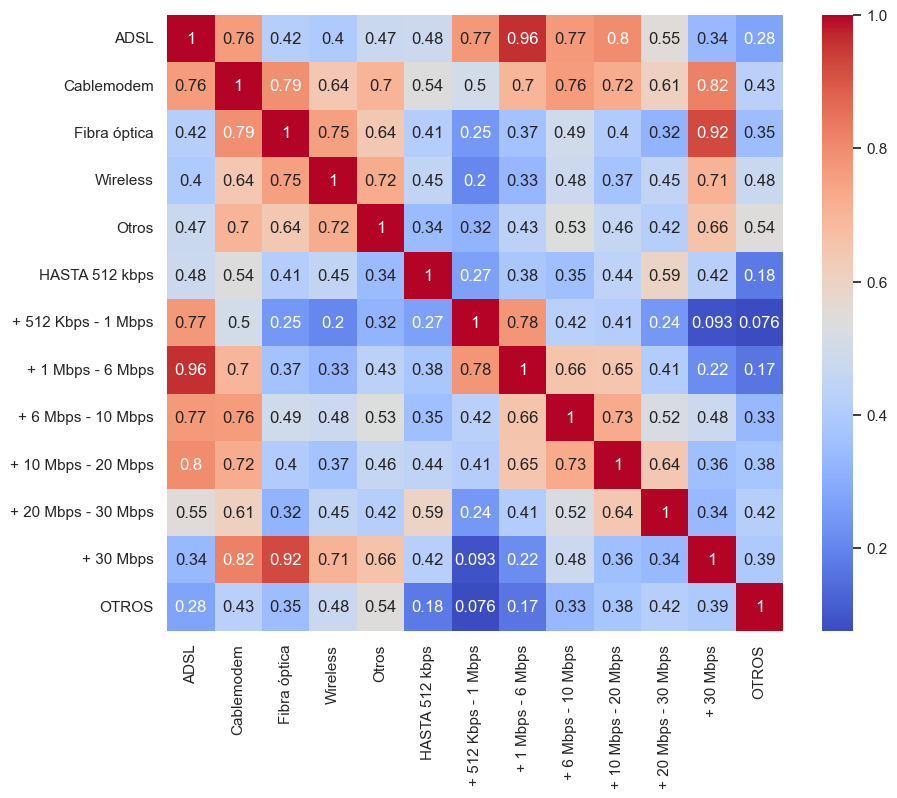

In [106]:
# Mapa de correlación y calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', square = True)

Efectivamente vemos una fuerte correlación en velocidades bajas y ADSL, velocidades medias y CABLEMODEM y +30 Mbps con Fibra óptica (0.92).
Mi conclusión es que debemos invertir en fibra óptica porque la tendencia del mercado es hacia mayores velocidades y la fibra óptica es lo adecuado. Vamos a buscar respaldar nuestra hipótesis.

Dataset complementario extraído de Eurostat, almacén de datos de la Unión Europea https://ec.europa.eu/eurostat/web/main/data/database

In [107]:
# Broadband internet coverage by speed (isoc_cbs)

coverage_by_speed = pd.read_csv('Datasets\Complementarios\isoc_cbs.tsv', sep='\t')

In [108]:
coverage_by_speed.head()

,"unit,inet_spd,terrtypo,geo\time",2021,2020,2019,2018,2017,2016,2015,2014,2013
0,"PC_HH,GBPS_GT1,TOTAL,AT",45.4,36.9,13.8,:,:,:,:,:,:
1,"PC_HH,GBPS_GT1,TOTAL,BE",69,49.4,49.2,:,:,:,:,:,:
2,"PC_HH,GBPS_GT1,TOTAL,BG",15.9,8.6,6.5,:,:,:,:,:,:
3,"PC_HH,GBPS_GT1,TOTAL,CH",63.7,62.9,40.3,:,:,:,:,:,:
4,"PC_HH,GBPS_GT1,TOTAL,CY",41.4,26.2,10.1,:,:,:,:,:,:


In [109]:
# Todos los valores tienen un espacio, lo eliminamos para todos los valores
coverage_by_speed = coverage_by_speed.applymap(lambda x: str(x).strip())
# Las columnas de años también, corregimos
coverage_by_speed.columns = coverage_by_speed.columns.str.strip()

In [110]:
# El dataset tiene columnas agrupadas. Las separamos
coverage_by_speed[['unit', 'inet_spd', 'terrtypo', 'geo\\time']] = coverage_by_speed['unit,inet_spd,terrtypo,geo\\time'].str.split(',', expand = True)
coverage_by_speed = coverage_by_speed.drop(columns = ['unit,inet_spd,terrtypo,geo\\time'])

In [111]:
# Relleno los valores que tiene : con None
coverage_by_speed.replace(":", None, inplace = True)
# Las columnas con valores, las hacemos float
coverage_by_speed.iloc[:,:8] = coverage_by_speed.iloc[:,:8].astype(float)

In [112]:
coverage_by_speed

,2021,2020,2019,2018,2017,2016,2015,2014,2013,unit,inet_spd,terrtypo,geo\time
0,45.4,36.9,13.8,NaN,NaN,NaN,NaN,NaN,None,PC_HH,GBPS_GT1,TOTAL,AT
1,69.0,49.4,49.2,NaN,NaN,NaN,NaN,NaN,None,PC_HH,GBPS_GT1,TOTAL,BE
2,15.9,8.6,6.5,NaN,NaN,NaN,NaN,NaN,None,PC_HH,GBPS_GT1,TOTAL,BG
3,63.7,62.9,40.3,NaN,NaN,NaN,NaN,NaN,None,PC_HH,GBPS_GT1,TOTAL,CH
4,41.4,26.2,10.1,NaN,NaN,NaN,NaN,NaN,None,PC_HH,GBPS_GT1,TOTAL,CY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,93.7,87.0,82.0,75.6,67.9,66.9,65.9,64.8,34.5,PC_HH,MBPS_GT30,TOTAL,RO
124,88.9,87.5,85.1,81.9,77.9,74.2,72.6,72.6,72.1,PC_HH,MBPS_GT30,TOTAL,SE
125,89.5,87.6,86.9,85.9,83.2,81.6,78.1,74.6,71.1,PC_HH,MBPS_GT30,TOTAL,SI
126,82.3,74.1,70.9,72.4,70.0,64.3,53.9,48.8,45.9,PC_HH,MBPS_GT30,TOTAL,SK


In [113]:
# Nos interesa saber la cobertura en general de la Unión europea, no un país particular, así que agrupamos por velocidades.
aux_coverage_by_speed = coverage_by_speed.groupby("inet_spd").mean()
aux_coverage_by_speed = aux_coverage_by_speed.reindex(columns = aux_coverage_by_speed.columns[::-1]).reset_index()      # Ordenamos de 2014 a 2022         
aux_coverage_by_speed = aux_coverage_by_speed.set_index("inet_spd")

C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_7104\1976536468.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux_coverage_by_speed = coverage_by_speed.groupby("inet_spd").mean()


In [114]:
# Convertir el DataFrame en un formato adecuado para Seaborn
aux_coverage_by_speed = aux_coverage_by_speed.T     # Invertimos filas por columnas
aux_coverage_by_speed = aux_coverage_by_speed.reset_index()
aux_coverage_by_speed = aux_coverage_by_speed.rename(columns = {"index": "Year"})
aux_coverage_by_speed = aux_coverage_by_speed[["Year", "MBPS_GT2", "MBPS_GT30", "MBPS_GT100", "GBPS_GT1"]]      # Damos el orden creciente de velocidad

In [115]:
aux_coverage_by_speed

inet_spd,Year,MBPS_GT2,MBPS_GT30,MBPS_GT100,GBPS_GT1
0,2014,94.546875,69.265625,51.993750,NaN
1,2015,94.875000,72.231250,55.218750,NaN
2,2016,94.662500,75.603125,58.087500,NaN
3,2017,94.687500,79.037500,61.768750,NaN
4,2018,94.890625,82.650000,66.425000,NaN
5,2019,95.446875,85.825000,74.512500,38.059375
6,2020,96.459375,88.790625,79.146875,48.328125
7,2021,NaN,92.206250,84.203125,59.750000


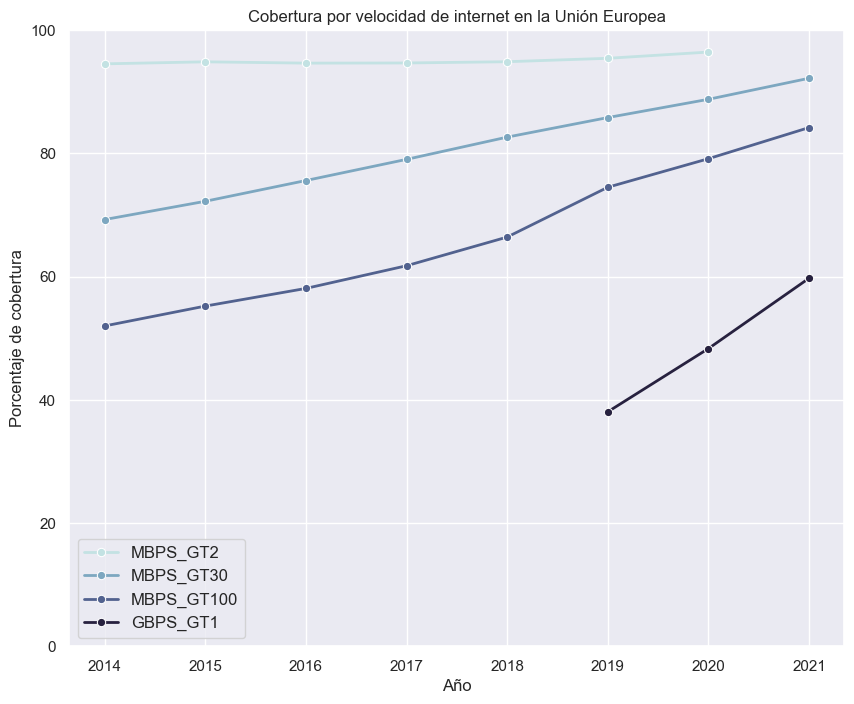

In [116]:
# Gráfico de líneas con las velocidades de la UE
plt.figure(figsize=(10, 8))

# Paleta de colores que aumenta gradualmente en intensidad
palette = sns.color_palette("ch:start=.2,rot=-.3", len(aux_coverage_by_speed.columns[1:]))

for i, columna in enumerate(aux_coverage_by_speed.columns[1:]):
    sns.lineplot(data = aux_coverage_by_speed, x = 'Year', y = columna, marker = 'o', markersize = 6,
                 linewidth = 2, label = columna, color = palette[i])

# Titulo y etiquetas de los ejes
plt.title('Cobertura por velocidad de internet en la Unión Europea')
plt.xlabel('Año')
plt.ylabel('Porcentaje de cobertura')
plt.ylim(0, 100) 
plt.legend(fontsize = 'medium')

plt.show()

Como vemos, en el año 2019 el 75% de Europa contaba con redes de fibra de + de 100 Mbps y el 40% con redes de + 1 Gbps. Al 2021 el 60% del territorio está cubierto con redes por encima del Gbps de velocidad de descarga. Con estos resultados vemos que Argentina está atrasada al menos 5 años respecto a la UE, siendo generosos. La brecha es importante y nos brinda una gran oportunidad de negocio.

Siguiendo con el análisis de la UE, vamos a ver la cobertura por tecnología.

In [117]:
# Broadband internet coverage by technology (isoc_cbt)

coverage_by_technology = pd.read_csv('Datasets\Complementarios\isoc_cbt.tsv', sep='\t')

In [118]:
coverage_by_technology.head()

,"unit,inet_tec,terrtypo,geo\time",2021,2020,2019,2018,2017,2016,2015,2014,2013
0,"PC_HH,5G,DEG3,AT",36.3,7.5,:,:,:,:,:,:,:
1,"PC_HH,5G,DEG3,BE",0,0,:,:,:,:,:,:,:
2,"PC_HH,5G,DEG3,BG",8.6,0,:,:,:,:,:,:,:
3,"PC_HH,5G,DEG3,CH",88.8,40,:,:,:,:,:,:,:
4,"PC_HH,5G,DEG3,CY",32.2,0,:,:,:,:,:,:,:


In [119]:
# Hacemos el mismo ETL que el dataset anterior, tienen el mismo formato

# Todos los valores tienen un espacio, lo eliminamos para todos los valores
coverage_by_technology = coverage_by_technology.applymap(lambda x: str(x).strip())
# Las columnas de años también, corregimos
coverage_by_technology.columns = coverage_by_technology.columns.str.strip()
# El dataset tiene columnas agrupadas. Las separamos
coverage_by_technology[['unit', 'inet_tec', 'terrtypo', 'geo\\time']] = coverage_by_technology['unit,inet_tec,terrtypo,geo\\time'].str.split(',', expand = True)
coverage_by_technology = coverage_by_technology.drop(columns = ['unit,inet_tec,terrtypo,geo\\time'])
# Relleno los valores que tiene : con None
coverage_by_technology.replace(":", None, inplace = True)
# Las columnas con valores, las hacemos float
coverage_by_technology.iloc[:,:8] = coverage_by_technology.iloc[:,:8].astype(float)

Analizamos solo la cobertura de la red de fibra óptica en la UE (FTTP: Fiber to the premises)

In [120]:
# https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes

aux_coverage_by_technology = coverage_by_technology[coverage_by_technology["inet_tec"] == "FTTP"].sort_values("2021", ascending = False).head(10)

In [121]:
aux_coverage_by_technology

,2021,2020,2019,2018,2017,2016,2015,2014,2013,unit,inet_tec,terrtypo,geo\time
501,89.5,88.1,88.1,87.8,85.7,85.2,85.0,83.9,82.9,PC_HH,FTTP,TOTAL,LV
490,88.9,84.9,80.4,77.4,71.4,62.8,52.8,44.8,22.7,PC_HH,FTTP,TOTAL,ES
506,87.6,82.3,76.6,70.2,63.6,49.6,47.2,45.3,42.1,PC_HH,FTTP,TOTAL,PT
497,87.6,83.5,80.4,76.2,72.3,71.1,60.4,59.9,60.8,PC_HH,FTTP,TOTAL,IS
507,87.1,75.9,68.1,62.7,61.0,59.7,58.2,58.0,54.7,PC_HH,FTTP,TOTAL,RO
482,84.7,75.2,65.2,54.2,45.2,38.2,32.2,28.3,22.9,PC_HH,FTTP,TOTAL,BG
508,82.5,80.5,77.1,72.2,66.4,60.8,56.4,56.4,51.8,PC_HH,FTTP,TOTAL,SE
465,78.4,66.3,54.7,39.4,29.1,24.0,2.3,2.3,2.1,PC_HH,FTTP,DEG3,IS
499,78.2,67.1,61.0,60.6,54.4,50.1,49.6,49.2,48.7,PC_HH,FTTP,TOTAL,LT
455,77.8,70.9,65.8,60.8,54.8,49.0,45.6,42.0,4.2,PC_HH,FTTP,DEG3,DK


In [122]:
# Debemos modificar los country codes de 2 letras a 3 para poder hacer el mapa de Europa con los países.
aux_coverage_by_technology["geo\\time"] = ["LVA", "ESP", "PRT", "ISL", "ROU", "BGR", "SWE", "ISL", "LTU", "DNK"]

C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_7104\878192230.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


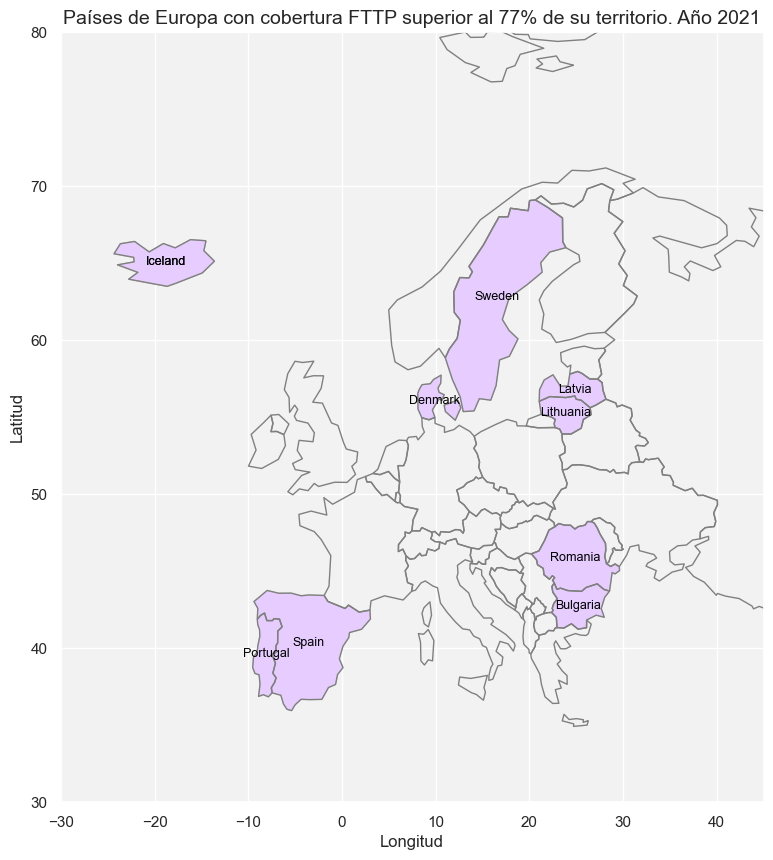

In [123]:
# Usamos geopandas para cargar los datos geográficos de Europa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']
# Fusionamos los datos geográficos con nuestros datos
merged = europe.merge(aux_coverage_by_technology, left_on = 'iso_a3', right_on='geo\\time')

fig, ax = plt.subplots(figsize = (10, 10))
# Establecer el color de fondo del mapa
ax.set_facecolor('#F2F2F2')  # Color de fondo gris claro

# Configurar los colores y leyenda
cmap = 'YlGnBu'
# Graficar el contorno de Europa
europe.boundary.plot(ax=ax, linewidth=1.0, color='grey')
# Pintar los países con mejor conectividad de fibra óptica
color = '#E6CCFF'       # Color lila de cada país resaltado
merged.plot(color = color, linewidth = 0.8, ax = ax, edgecolor = '0.8')
# Agregar los nombres de los países
for geometry, label in zip(merged.geometry, merged['name']):
    x, y = geometry.centroid.coords[0]
    ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points", fontsize = 9, color='black', ha='center', va='center')

ax.set_xlim(-30, 45)  # Ajustar según las coordenadas geográficas de Europa
ax.set_ylim(30, 80)

# Titulo y etiquetas
ax.set_title('Países de Europa con cobertura FTTP superior al 77% de su territorio. Año 2021', fontdict={'fontsize': '14'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()

Como conclusión podemos decir que el futuro de nuestro país a un mediano plazo será la integración de la fibra óptica en la gran cantidad del territorio, como sucede en Europa. En 2023 estos países con la mejor conectividad de Europa deben contar con un 90% de cobertura de fibra óptica.

In [133]:
# Vamos a hacer una comparación de velocidades entre Córdoba y CABA. Tomaremos el trimestre mas reciente (dato mas reciente)

# Encontrar el año más reciente
año_mas_reciente = df_accesos_veloc_prov["Año"].max()

# Seleccionar el trimestre más reciente del año más reciente
trimestre_mas_reciente = df_accesos_veloc_prov[df_accesos_veloc_prov["Año"] == año_mas_reciente]["Trimestre"].max()

# Filtrar el DataFrame para obtener los datos del trimestre más reciente
auxiliar_veloc = df_accesos_veloc_prov[(df_accesos_veloc_prov["Año"] == año_mas_reciente) & (df_accesos_veloc_prov["Trimestre"] == trimestre_mas_reciente)]

# Reseteamos el indice
auxiliar_veloc.reset_index(drop = True, inplace = True)

In [134]:
# Lo normalizamos para obtener porcentajes del total de cada provincia
auxiliar_veloc.iloc[:, 3:-1] = auxiliar_veloc.iloc[:, 3:-1].apply(lambda x: x/auxiliar_veloc.iloc[:, -1]*100)

C:\Users\Mauricio Figueroa\AppData\Local\Temp\ipykernel_7104\3942843528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auxiliar_veloc.iloc[:, 3:-1] = auxiliar_veloc.iloc[:, 3:-1].apply(lambda x: x/auxiliar_veloc.iloc[:, -1]*100)


In [135]:
cordoba_veloc = auxiliar_veloc.iloc[np.where(auxiliar_veloc["Provincia"] == "Córdoba")[0], 3:-2].values[0].tolist()
capital_veloc = auxiliar_veloc.iloc[np.where(auxiliar_veloc["Provincia"] == "Capital Federal")[0], 3:-2].values[0].tolist()
velocidades = auxiliar_veloc.columns[3:-2]

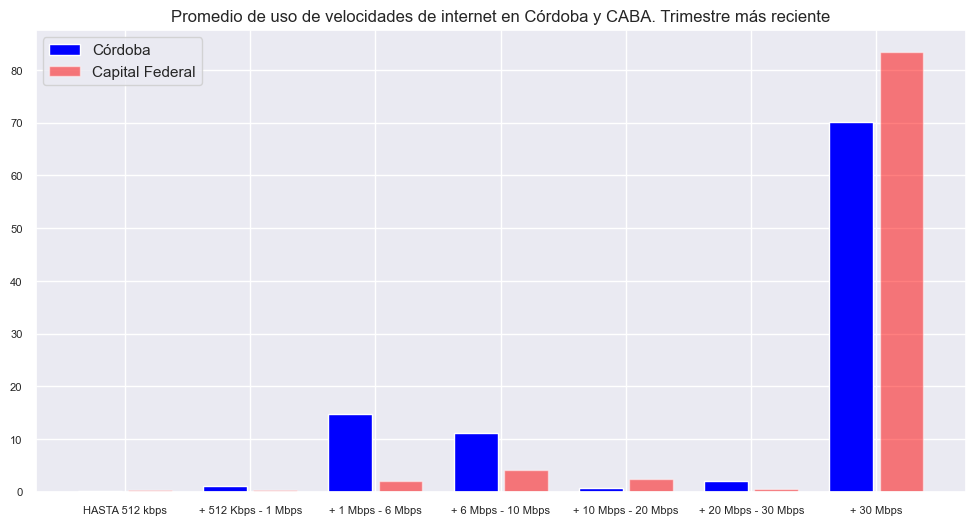

In [136]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))
indice = np.arange(len(velocidades))

# Graficar las barras de la Provincia A
ax.bar(x = indice, height = cordoba_veloc, width = 0.35, color='blue', label = 'Córdoba')

# Graficar las barras de la Provincia B
ax.bar(x = indice+0.4, height = capital_veloc, width = 0.35, color='red', label = 'Capital Federal', alpha=0.5)

# Configurar los ticks del eje x, las etiquetas y el título
ax.set_title("Promedio de uso de velocidades de internet en Córdoba y CABA. Trimestre más reciente")
ax.set_xticks(indice+0.2)
ax.set_xticklabels(velocidades)
ax.tick_params(labelsize = 8)
ax.legend()

plt.show()

En Córdoba se nota la fuerte presencia de bajas velocidades en relación a CABA. En un futuro esta brecha en la conectividad se irá recortando por lo que vemos una oportunidad de mercado de la fibra óptica en la migración de usuarios de ADSL (bajas velocidades) a fibra.

¿En qué localidades podríamos hacer sitio, establecer nuestro plan de trabajo? ¿Cuáles son aquellas con una baja calidad de conectividad y que a su vez sean convenientes para establecer un plan de trabajo, oportunidades de inversión y demás.

### Accesos a internet fijo por tecnología y localidad

In [170]:
df_accesos_tecn_localidad = pd.read_csv("Datasets\Internet\Accesos_Internet_fijo_por_tecnología_y_localidad.csv")
df_accesos_tecn_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,"4,54",- 0,3,- 0,852,- 0,706,"6,98",NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,"1,28",NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [171]:
# Eliminamos la ultima columna
df_accesos_tecn_localidad = df_accesos_tecn_localidad.drop(columns = ["Unnamed: 13"])

In [175]:
# Corregimos puntos y guiones
df_accesos_tecn_localidad.iloc[:,4:] = df_accesos_tecn_localidad.iloc[:,4:].applymap(lambda x: str(x).replace('-', '').replace(',', '.').strip())

In [179]:
# Define una función para multiplicar por mil si el valor es un string con coma
def multiplicar_por_mil(valor):
    if isinstance(valor, str) and '.' in valor:
        try:
            return float(valor) * 1000 
        except ValueError:
            return valor  # En caso de que la conversión falle, devuelve el valor original
    return valor

# Aplica la función a todas las celdas del DataFrame
df_accesos_tecn_localidad.iloc[:, 4:] = df_accesos_tecn_localidad.iloc[:, 4:].applymap(multiplicar_por_mil)

In [181]:
# Forzamos a que tome la columna corregida como valores enteros
df_accesos_tecn_localidad.iloc[:, 4:] = df_accesos_tecn_localidad.iloc[:, 4:].astype(int)

Queremos analizar las localidades de la provincia de Córdoba

In [183]:
df_accesos_cordoba = df_accesos_tecn_localidad.loc[df_accesos_tecn_localidad["Provincia"] == "CORDOBA"]

In [184]:
# Ordenamos de mayor a menor, por cantidad de accesos a internet
df_accesos_cordoba = df_accesos_cordoba.sort_values("Total general", ascending = False)

In [185]:
df_accesos_cordoba.head(10)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
953,CORDOBA,Capital,Córdoba,14014010,47780,218600,44,222070,1220,11,0,4270,493990
1128,CORDOBA,Río Cuarto,Río Cuarto,14098230,5890,37340,1,22510,0,7,0,1060,66810
1016,CORDOBA,General San Martín,Villa María,14042170,2210,15330,0,11560,0,2,0,1440,30540
1106,CORDOBA,Punilla,Villa Carlos Paz,14091250,1760,22550,0,9,1,2,0,642,24970
1231,CORDOBA,San Justo,San Francisco,14140360,2950,16500,0,7,60,0,0,1230,20750
1281,CORDOBA,Tercero Arriba,Río Tercero,14161150,190,8790,0,10,0,2,0,1130,20110
1244,CORDOBA,Santa María,Alta Gracia,14147010,3150,1430,0,11380,0,0,0,327,16290
1299,CORDOBA,Unión,Bell Ville,14182060,555,8010,0,3330,0,0,0,0,11890
960,CORDOBA,Colón,Jesús María,14021140,1040,3700,0,6650,0,0,0,18,11400
1053,CORDOBA,Marcos Juárez,Marcos Juárez,14063180,385,10210,0,4,0,0,0,240,10840


In [194]:
# Detectamos un error particular en Rio Tercero, en Fibra Optica corresponde un 10000. Corregimos
df_accesos_cordoba["FIBRA OPTICA"][1281] = df_accesos_cordoba["FIBRA OPTICA"][1281] * 1000

Vemos que de las grandes localidades, hay varias donde el ADSL y CableMODEM continúan siendo las tecnologías de referencia. La red de fibra óptica no se ha posicionado aún. Vamos a hacer algunos gráficos comparativos.

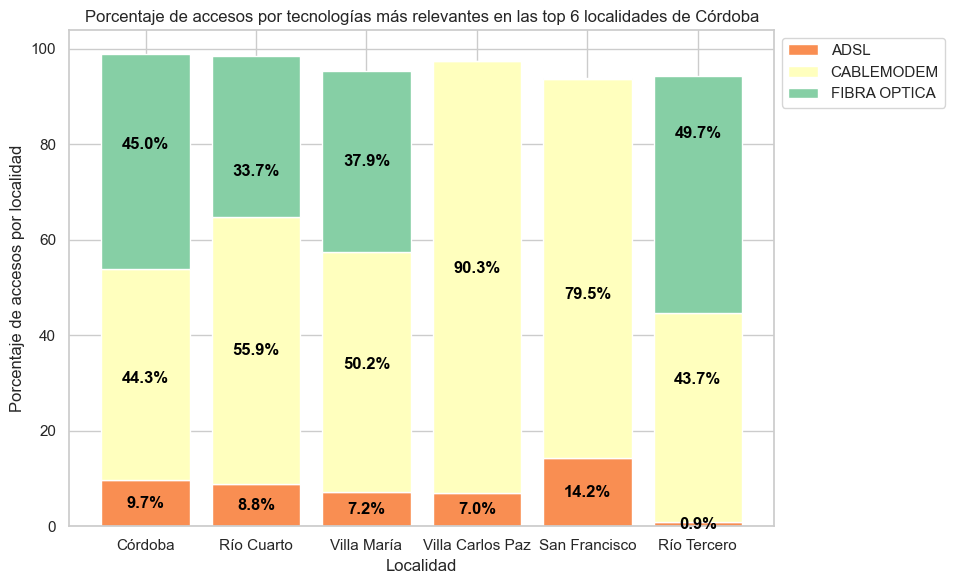

In [195]:
# Seleccionar las columnas de interés
columnas_graficar = ['ADSL', 'CABLEMODEM', 'FIBRA OPTICA']

# Filtrar el DataFrame
df_bar_plot = df_accesos_cordoba[['Localidad'] + columnas_graficar + ["Total general"]].head(6)

# Dividir cada columna por la columna "Total general"
for columna in columnas_graficar:
    df_bar_plot[columna] = df_bar_plot[columna] / df_bar_plot["Total general"] * 100

# Resetear el índice
df_bar_plot.reset_index(drop=True, inplace=True)

# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Crear el gráfico de barras apiladas
plt.figure(figsize=(8, 6))
palette = sns.color_palette("Spectral", len(columnas_graficar))  # Generar una paleta de colores automáticamente

# Variable para almacenar las alturas acumuladas de las barras
bottom = np.zeros(len(df_bar_plot['Localidad']))

for i, columna in enumerate(columnas_graficar):
    bars = plt.bar(df_bar_plot['Localidad'], df_bar_plot[columna], bottom=bottom, color=palette[i], label=columna)
    
    # Agregar etiquetas con porcentajes dentro de las barras
    for bar in bars:
        yval = bar.get_height()
        yval = round(yval, 1)
        # Mostrar la etiqueta solo si el porcentaje es diferente de 0.0
        if yval != 0.0:
            plt.text(bar.get_x() + bar.get_width()/2, yval/2 + bottom[i], f'{yval:.1f}%', ha='center', va='center', color='black', fontweight='bold')

    bottom += df_bar_plot[columna]  # Actualizar las alturas acumuladas

# Agregar título y etiquetas de los ejes
plt.title('Porcentaje de accesos por tecnologías más relevantes en las top 6 localidades de Córdoba')
plt.xlabel('Localidad')
plt.ylabel('Porcentaje de accesos por localidad')

# Ajustar el tamaño del gráfico
plt.tight_layout()

# Mostrar la leyenda
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


En ciudades importantes de la provincia de Córdoba como Carlos Paz o San Francisco es casi nula la cantidad de accesos por fibra óptica, podemos trabajar sobre ello.

In [ ]:
# Extramos los datasets para ser tomados por Power BI
df_accesos_tecn_nac.to_csv("Datasets\Power BI\Accesos_Internet_fijo_por_tecnología_nacional.csv", index = False)
df_accesos_veloc_nac.to_csv("Datasets\Power BI\Acceso_Internet_Fijo_por_rangos_velocidad_bajada_nacional.csv", index = False)
df_accesos_tecn_prov.to_csv("Datasets\Power BI\Acceso_Internet_fijo_por_tecnología_y_provincia.csv", index = False)
df_accesos_veloc_prov.to_csv("Datasets\Power BI\Acceso_Internet_Fijo_por_rangos_velocidad_bajada_y_provincia.csv", index = False)
df_accesos_tecn_localidad.to_csv("Datasets\Power BI\Accesos_Internet_fijo_por_tecnología_y_localidad.csv", index = False)


#### KPI Propuesto

Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

In [200]:
# Accesos por tecnología y provincia está ordenado por provincia, año y trimestre de antemano. Esto nos permite hacer el análisis siguiente

# Columna con la diferencia entre trimestres por provincia
df_accesos_tecn_prov['Aumento_Total'] = df_accesos_tecn_prov.groupby('Provincia')['Total'].diff()

# Con la diferencia podemos calcular el porcentaje de aumento respecto al trimestre anterior
df_accesos_tecn_prov['Porcentaje_Aumento'] = (df_accesos_tecn_prov['Aumento_Total'] / df_accesos_tecn_prov.groupby('Provincia')['Total'].shift()) * 100

In [202]:
df_accesos_tecn_prov.head(3)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Aumento_Total,Porcentaje_Aumento
768,2014,1,Buenos Aires,1567685,1000879,120960,16528,33824,2739876,NaN,NaN
744,2014,2,Buenos Aires,1568881,1025490,120008,17020,33147,2764546,24670.0,0.900406
720,2014,3,Buenos Aires,1562533,1110628,124474,20049,31881,2849565,85019.0,3.075333


In [203]:
# Hay filas con NaN que corresponden al primer trimestre con datos, para no borrar esas filas hacemos otro dataframe
df_accesos_tecn_prov_aux = df_accesos_tecn_prov.dropna(subset=['Aumento_Total', 'Porcentaje_Aumento'])

In [210]:
df_accesos_tecn_prov_aux["Porcentaje_Aumento"].describe()

count    768.000000
mean       3.132267
std       14.967856
min      -31.378056
25%        0.122995
50%        1.157471
75%        2.802369
max      246.660145
Name: Porcentaje_Aumento, dtype: float64

In [219]:
# Hay valores extraños de aumento. Vamos a analizar
df_accesos_tecn_prov_aux.sort_values("Porcentaje_Aumento", ascending = False).head(10)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Aumento_Total,Porcentaje_Aumento
354,2018,3,San Luis,11096,7784,368,52859,2314,74421,52953.0,246.660145
443,2017,3,La Rioja,16638,34984,14,252,250,51913,35624.0,218.699736
453,2017,3,Santiago Del Estero,27733,54096,19,911,350,82794,49598.0,149.409567
321,2018,4,Jujuy,33248,12484,153,640,43608,90133,45198.0,100.585290
450,2017,3,San Luis,11407,7576,347,26,2363,21719,8412.0,63.214849
83,2021,2,La Rioja,11627,54255,9445,6245,300,81602,28974.0,55.054344
402,2018,1,San Luis,11104,7594,368,16,2314,21396,6492.0,43.558776
382,2018,2,Tierra Del Fuego,19372,22756,531,1,2047,44707,13093.0,41.415196
285,2019,2,Santiago Del Estero,24393,64783,219,2759,346,126754,36901.0,41.068189
70,2021,3,Tierra Del Fuego,12853,36958,6,16,3900,50223,14530.0,40.708262


In [217]:
# Analizamos San Luis en 2018
df_accesos_tecn_prov[(df_accesos_tecn_prov["Provincia"] == "San Luis") & (df_accesos_tecn_prov["Año"] == 2018)]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Aumento_Total,Porcentaje_Aumento
402,2018,1,San Luis,11104,7594,368,16,2314,21396,6492.0,43.558776
378,2018,2,San Luis,11104,7666,368,16,2314,21468,72.0,0.336511
354,2018,3,San Luis,11096,7784,368,52859,2314,74421,52953.0,246.660145
330,2018,4,San Luis,11108,7784,378,53097,23964,96331,21910.0,29.440615


Buscando en internet encontramos que en ese trimestre, en San Luis, se amplio la cobertura WiFi pública, por lo que los datos son válidos
https://agenciasanluis.com/notas/2018/07/13/el-servicio-de-wifi-gratuito-amplia-los-beneficios-transversalmente-a-todos-los-sectores-de-la-comunidad-de-san-luis/

In [218]:
# Analizamos La Rioja en 2017
df_accesos_tecn_prov[(df_accesos_tecn_prov["Provincia"] == "La Rioja") & (df_accesos_tecn_prov["Año"] == 2017)]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Aumento_Total,Porcentaje_Aumento
491,2017,1,La Rioja,16180,0,15,2,280,16225,-91.0,-0.557735
467,2017,2,La Rioja,16244,0,15,2,280,16289,64.0,0.394453
443,2017,3,La Rioja,16638,34984,14,252,250,51913,35624.0,218.699736
419,2017,4,La Rioja,16912,34984,14,253,310,52194,281.0,0.541290


Aparentemente antes de esta fecha el gobierno no tenía datos de las conexiones por cablemodem en La Rioja.

Cada caso es particular, deberíamos analizar todos los outliers pero los tomamos como válidos porque debe suceder algo similar (tecnología no contabilizada o nuevos proyectos que amplían la cobertura drásticamente)

In [259]:
def plot_porcentaje_aumento(df, provincia):
    # Filtrar solo la provincia
    df_provincia = df[df['Provincia'] == provincia]

    # Crear el gráfico solo para la provincia
    plt.figure(figsize=(12, 8))
    plt.plot(df_provincia['Año'].astype(str) + 'Q' + df_provincia['Trimestre'].astype(str), df_provincia['Porcentaje_Aumento'])

    plt.title(f'Aumento de la cantidad de accesos en {provincia} respecto al trimestre anterior', fontsize = 14, pad = 20)
    plt.xlabel('Trimestre')
    plt.ylabel('Porcentaje de aumento')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Modificar las etiquetas del eje x
    nombres_años = df_provincia[df_provincia['Trimestre'] == 1]['Año'].astype(str).unique()

    # Encontrar los índices de los inicios de año
    indices_inicio_año = [i for i, valor in enumerate(df_provincia['Trimestre']) if valor == 1]

    # Asegurarse de que hay suficientes posiciones de inicio de año
    indices_inicio_año = indices_inicio_año[:len(nombres_años)]

    plt.xticks(indices_inicio_año, nombres_años)

    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


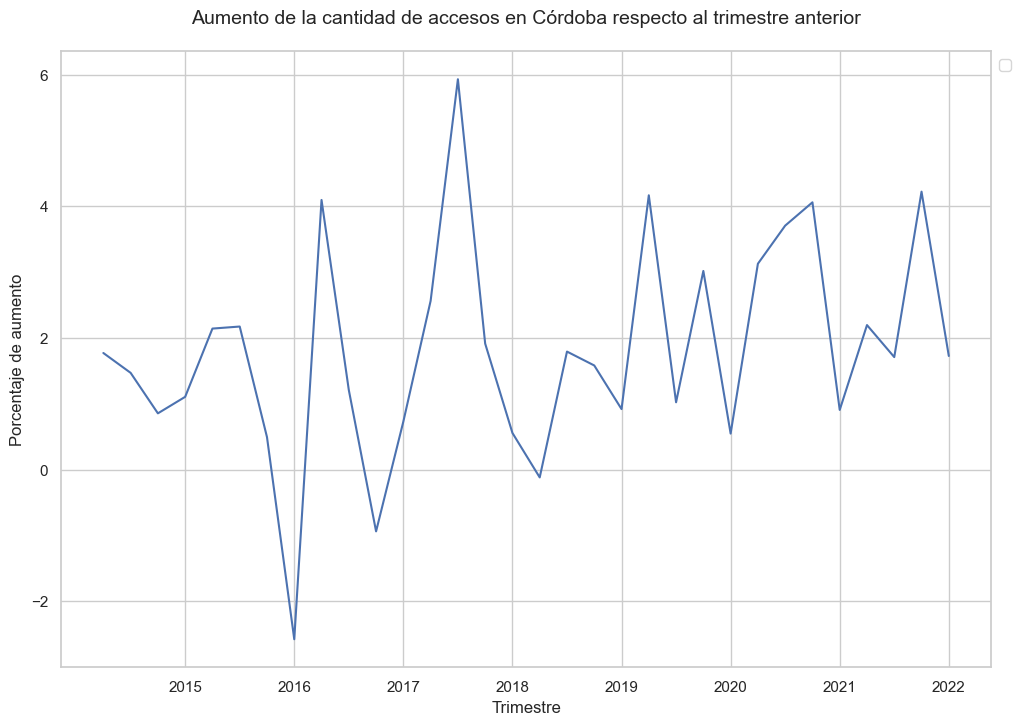

In [260]:
# Provincia de Córdoba
plot_porcentaje_aumento(df_accesos_tecn_prov_aux, 'Córdoba')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


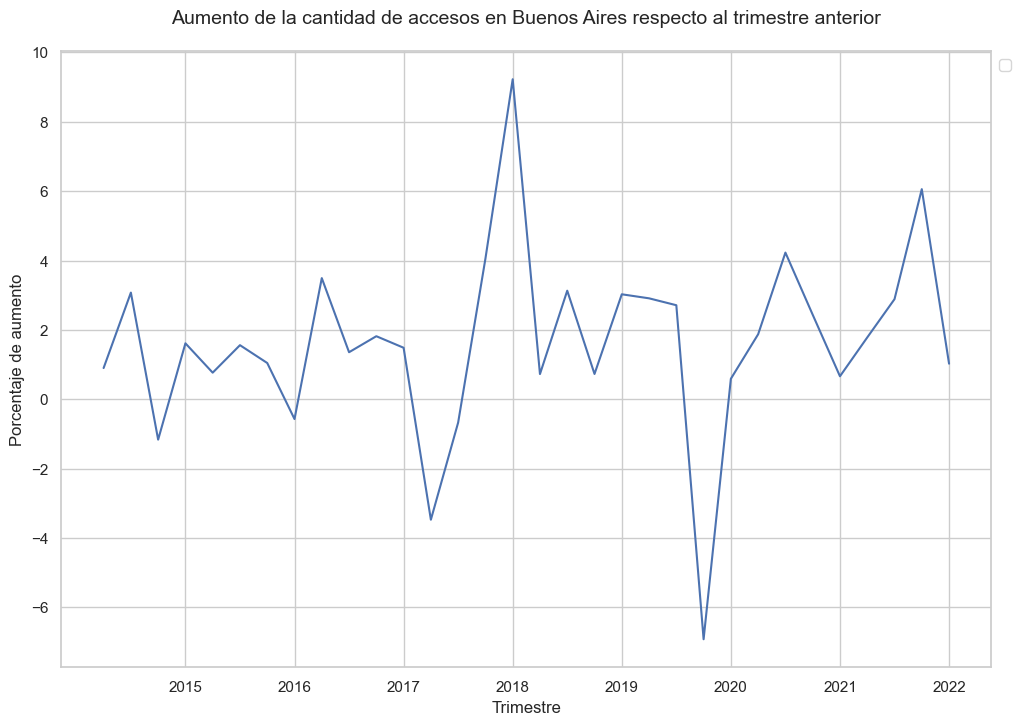

In [261]:
# Provincia de Buenos Aires
plot_porcentaje_aumento(df_accesos_tecn_prov_aux, 'Buenos Aires')